In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Machine_Learning/california_housing_test_1.csv')
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Unnamed: 9
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000,0.0
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500,NaN
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747,NaN
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000,NaN
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000,NaN
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000,NaN
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000,NaN
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000,NaN


In [3]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
Unnamed: 9,3000


In [4]:
df.drop('Unnamed: 9', axis=1, inplace=True)
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,2426


In [5]:
df.drop('ocean_proximity', axis=1, inplace=True)
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [6]:
import pandas as pd
import numpy as py
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df.head(30)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27,3885,661,1537,606,6.6085,344700
1,-118.30,34.26,43,1510,310,809,277,3.5990,176500
2,-117.81,33.78,27,3589,507,1484,495,5.7934,270500
3,-118.36,33.82,28,67,15,49,11,6.1359,330000
4,-119.67,36.33,19,1241,244,850,237,2.9375,81700
5,-119.56,36.51,37,1018,213,663,204,1.6635,67000
6,-121.43,38.63,43,1009,225,604,218,1.6641,67000
7,-120.65,35.48,19,2310,471,1341,441,3.2250,166900
8,-122.84,38.40,15,3080,617,1446,599,3.6696,194400
9,-118.02,34.08,31,2402,632,2830,603,2.3333,164200


In [8]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27,3885,661,1537,606,6.6085,344700
1,-118.30,34.26,43,1510,310,809,277,3.5990,176500
2,-117.81,33.78,27,3589,507,1484,495,5.7934,270500
3,-118.36,33.82,28,67,15,49,11,6.1359,330000
4,-119.67,36.33,19,1241,244,850,237,2.9375,81700


In [9]:
df.drop('longitude', axis=1, inplace=True)
df.drop('latitude', axis=1, inplace=True)
df.drop('housing_median_age', axis=1, inplace=True)
df.drop('total_rooms', axis=1, inplace=True)
df.drop('population', axis=1, inplace=True)
df.drop('median_income', axis=1, inplace=True)

In [10]:
df.head(5)

,total_bedrooms,households,median_house_value
0,661,606,344700
1,310,277,176500
2,507,495,270500
3,15,11,330000
4,244,237,81700


In [11]:
df.drop('households', axis=1, inplace=True)

In [12]:
df.head(5)

,total_bedrooms,median_house_value
0,661,344700
1,310,176500
2,507,270500
3,15,330000
4,244,81700


In [13]:
x_train, x_test, y_train, y_test = train_test_split(df['total_bedrooms'], df['median_house_value'], test_size=0.2, random_state=0)

In [14]:
print(x_train)

2370     696
1774     507
731      323
271      411
1077     109
        ... 
763      312
835      195
1653    1002
2607     265
2732     300
Name: total_bedrooms, Length: 2400, dtype: int64


In [15]:
model = LinearRegression()
model.fit(x_train.values.reshape(-1,1), y_train.values)

LinearRegression()

In [16]:
y_pred = model.predict(x_test.values.reshape(-1,1))

In [17]:
print(y_test)
print(y_pred)

311     209400
1025     94300
1587    161800
2941     94600
2980     75100
         ...  
913     140500
1431    226900
654     161300
476     145500
2326    273200
Name: median_house_value, Length: 600, dtype: int64
[199740.63085079 201452.46927626 200442.92353816 200728.2299424
 203449.61410598 205293.13241033 202593.69489324 202001.13543827
 200399.0302452  203603.24063134 199565.05767894 209221.58213033
 205051.71929905 204261.64002575 199191.96468878 217144.32150976
 199257.80462822 224430.60814125 205161.45253145 202440.06836788
 207838.94340206 200377.08359872 209594.67512049 215147.17668004
 213874.27118417 198160.4723042  200837.96317481 207136.65071469
 195899.96771671 205095.61259201 216771.22851959 201189.10951849
 204437.21319759 199718.68420431 208453.44950351 209704.40835289
 198006.84577883 201167.16287201 193354.15672498 204656.6796624
 199740.63085079 217254.05474216 205732.06533994 200794.06988185
 194714.84880677 199411.43115358 199016.39151693 199762.57749727
 2111

In [18]:
print(y_train)

2370    455500
1774    187500
731     244900
271     276900
1077     85000
         ...  
763     283900
835     344000
1653    254100
2607    121300
2732     73100
Name: median_house_value, Length: 2400, dtype: int64


In [19]:
y_pred = model.predict(x_test.values.reshape(-1,1))
print(y_pred)
print(y_test)

[199740.63085079 201452.46927626 200442.92353816 200728.2299424
 203449.61410598 205293.13241033 202593.69489324 202001.13543827
 200399.0302452  203603.24063134 199565.05767894 209221.58213033
 205051.71929905 204261.64002575 199191.96468878 217144.32150976
 199257.80462822 224430.60814125 205161.45253145 202440.06836788
 207838.94340206 200377.08359872 209594.67512049 215147.17668004
 213874.27118417 198160.4723042  200837.96317481 207136.65071469
 195899.96771671 205095.61259201 216771.22851959 201189.10951849
 204437.21319759 199718.68420431 208453.44950351 209704.40835289
 198006.84577883 201167.16287201 193354.15672498 204656.6796624
 199740.63085079 217254.05474216 205732.06533994 200794.06988185
 194714.84880677 199411.43115358 199016.39151693 199762.57749727
 211152.8870206  208212.03639223 200113.72384095 229061.35054862
 203910.49368206 201189.10951849 201693.88238754 207926.72998798
 210209.18122194 219997.38555221 210516.43427267 204459.15984408
 202440.06836788 196053.594

In [20]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

13432112805.403187


In [21]:
rmse = (mse)**(0.5)
print(rmse)

115896.99221896652


In [22]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

0.005315327755363697


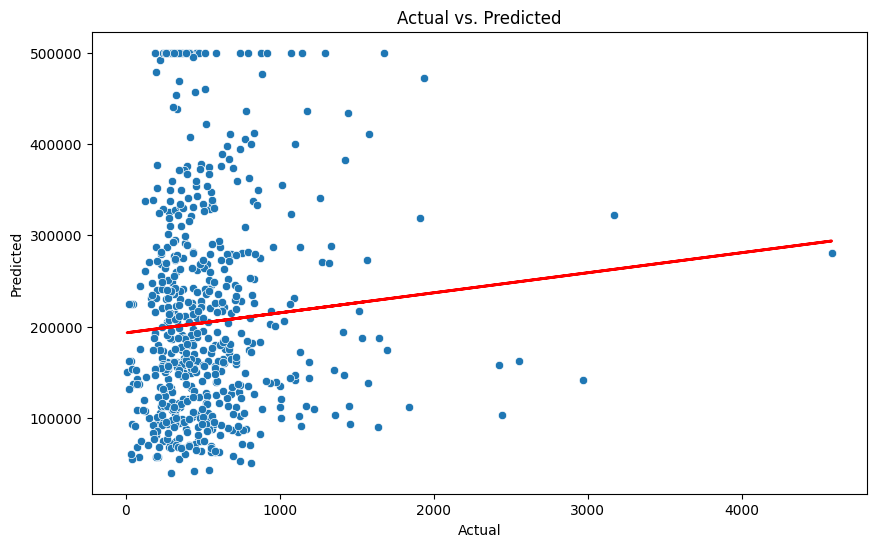

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_test, y=y_test)
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

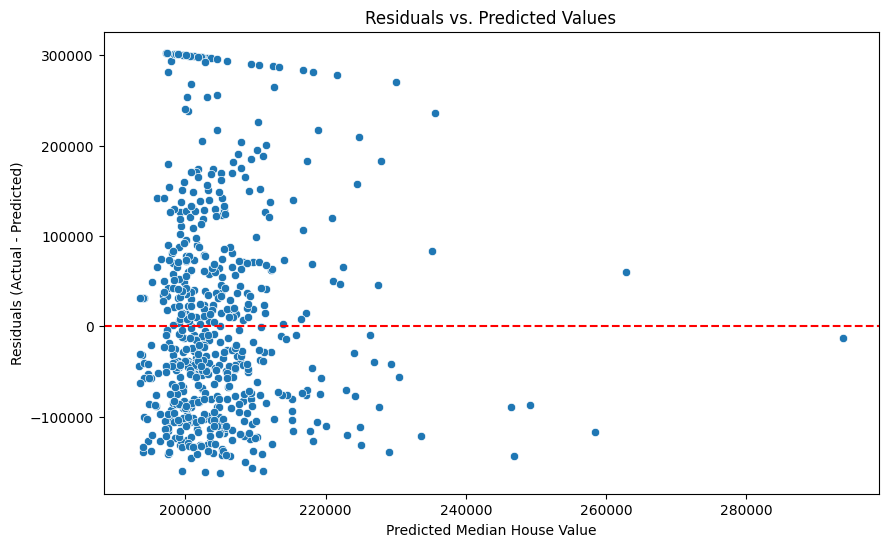

In [24]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Median House Value')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs. Predicted Values')
plt.show()